<a href="https://colab.research.google.com/github/spandit98/Transport_Demand_Prediction/blob/main/Transport_Demand_Prediction_Soumyadeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [2]:
#Import libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Transport Demand Prediction-20210805T031955Z-001/Transport Demand Prediction/Data _ Resources/Nairobi Transport Data.zip')

In [5]:
#Understanding the dataset
len(df)

51645

In [6]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [7]:
df.shape 

(51645, 10)

In [8]:
df.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,K0VXZR8AGV,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [10]:
#Understating the time period of the dataset
df.travel_date.unique

<bound method Series.unique of 0        17-10-17
1        19-11-17
2        26-11-17
3        27-11-17
4        27-11-17
           ...   
51640    20-04-18
51641    20-04-18
51642    20-04-18
51643    20-04-18
51644    14-11-17
Name: travel_date, Length: 51645, dtype: object>

In [11]:
#Finding null values
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [12]:
#Preparing data for EDA
source_count=df.travel_from.unique()

In [13]:
len(source_count)

17

In [14]:
df.travel_to.unique()

array(['Nairobi'], dtype=object)

In [15]:
#Finding the source of highest no. of buses
travel_source=df.travel_from.value_counts()

Text(0.5, 1.0, 'travel')

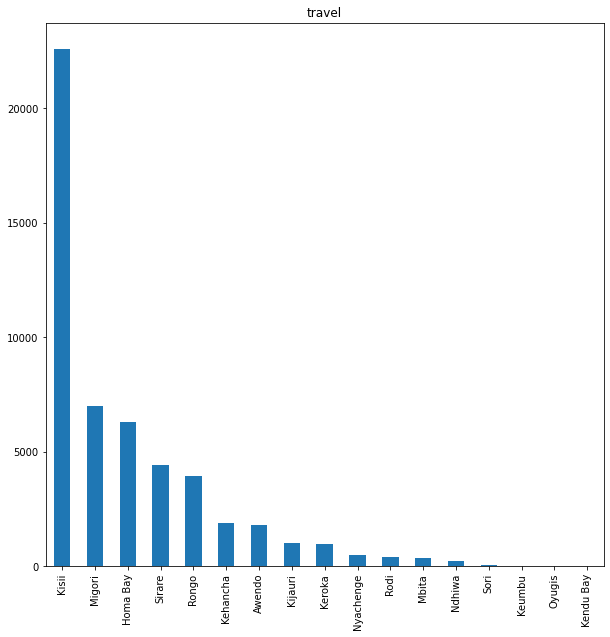

In [16]:
plt.subplots(figsize=(10,10))
travel_source.plot(kind='bar')
plt.title('travel')

In [17]:
#Finding most prefered payment method
df.payment_method.unique()

array(['Mpesa', 'Cash'], dtype=object)

In [18]:
payment_type=df.payment_method.value_counts()

([<matplotlib.patches.Wedge at 0x7f0dc4ee1650>,
 [Text(-1.0999740124079396, 0.007561218630501732, 'Mpesa'),
  Text(1.0999740121092798, -0.0075612620781424465, 'cash')],
 [Text(-0.5999858249497851, 0.004124301071182762, '99.8%'),
  Text(0.5999858247868798, -0.004124324769895879, '0.2%')])

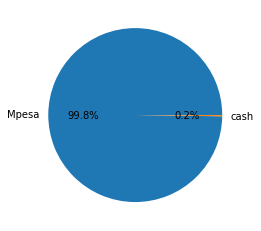

In [19]:
plt.pie(payment_type,labels=['Mpesa','cash'],autopct='%1.1f%%')

In [20]:
df['travel_time']=df['travel_time'].apply(lambda x: x[0:1])

In [21]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7,Awendo,Nairobi,Bus,49


In [22]:
#Finding the highest no. of buses at a given time
highest_no_of_buses=df.travel_time.value_counts()

Text(0.5, 1.0, 'travel')

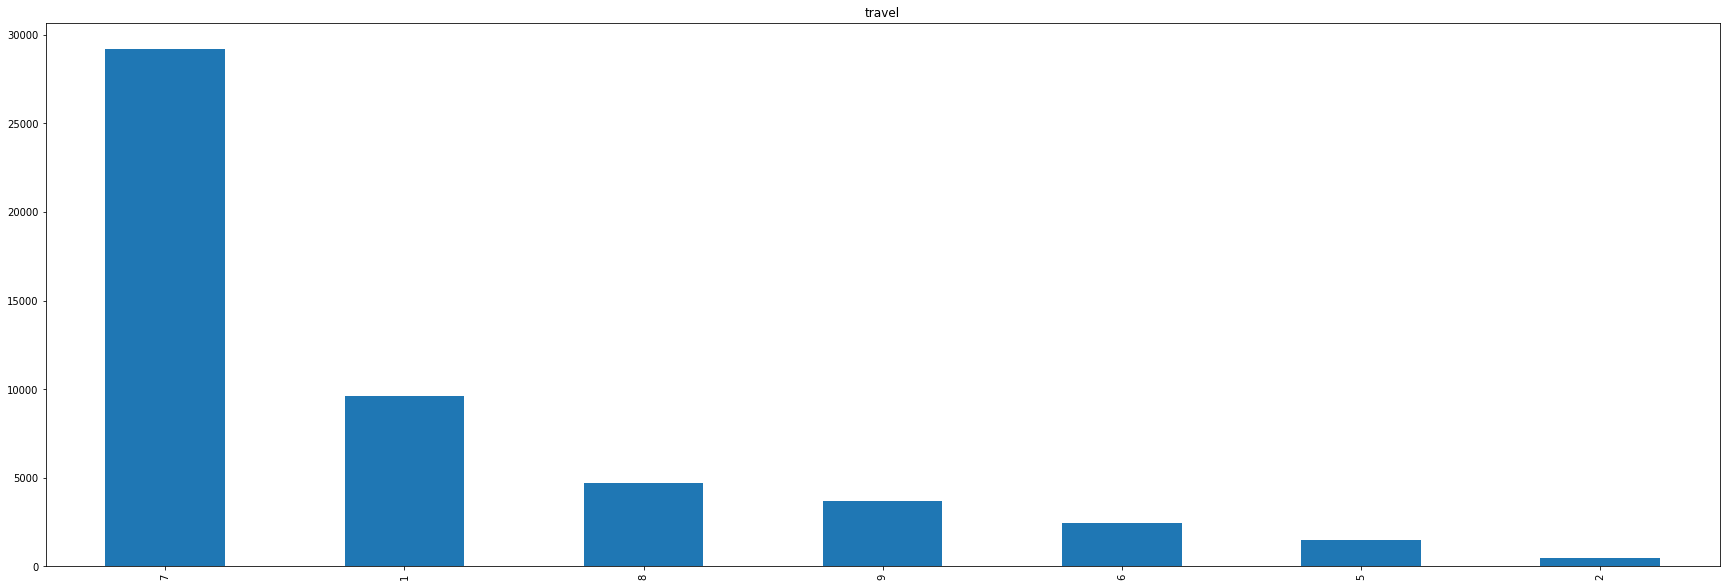

In [23]:
plt.subplots(figsize=(30,10))
highest_no_of_buses.plot(kind='bar')
plt.title('travel')

In [24]:
#Origin of buses departed at 7 o' clock
df1=df[(df['travel_time']=='7')]['travel_from']

In [25]:
rides_at_7=df1.value_counts()

Text(0.5, 1.0, 'travel')

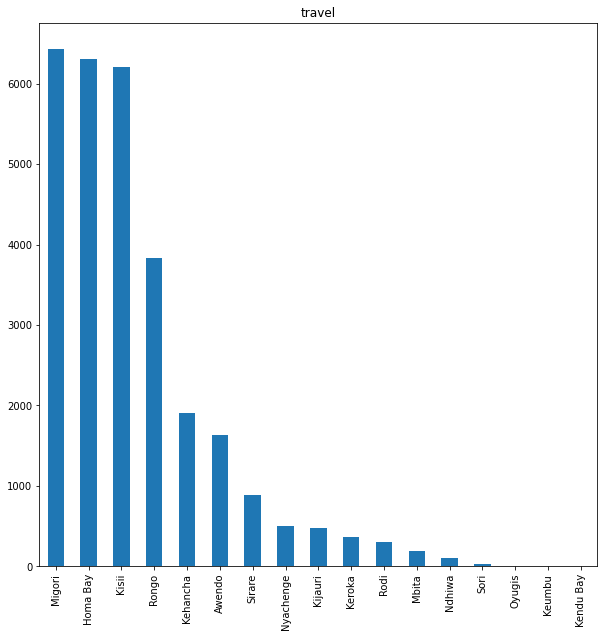

In [26]:
plt.subplots(figsize=(10,10))
rides_at_7.plot(kind='bar')
plt.title('travel')

In [27]:
#Finding the independent variable
df['seats_occupied']=df.groupby(['car_type','travel_date','travel_time','travel_from'])['travel_time'].transform('count')

In [28]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7,Homa Bay,Nairobi,Bus,49,36
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7,Migori,Nairobi,Bus,49,45
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8,Awendo,Nairobi,Bus,49,1
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8,Migori,Nairobi,Bus,49,29
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8,Migori,Nairobi,Bus,49,29
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7,Awendo,Nairobi,Bus,49,47


In [29]:
df.seat_number.unique()

array(['15A', '14A', '8B', '19A', '11A', '18B', '25', '21B', '22A', '17B',
       '1X', '3A', '1B', '1', '4A', '18A', '23A', '5', '16B', '8', '15B',
       '10', '3', '9', '7', '6', '4', '2', '20A', '9A', '22B', '23B',
       '24A', '2B', '13B', '24B', '14B', '20B', '19B', '10A', '17A', '2A',
       '7B', '6B', '5B', '3B', '4B', '1A', '5A', '6A', '21A', '13A', '8A',
       '9B', '12B', '10B', '7A', '16A', '12A', '11B', '14'], dtype=object)

In [30]:
df.payment_receipt.unique()

array(['UZUEHCBUSO', 'TIHLBUSGTE', 'EQX8Q5G19O', ..., 'LVN64LZDNN',
       'REYBSKTYWN', 'AQN7FBUSGP'], dtype=object)

In [31]:
#Eliminating some insignificant columns
df2=df.drop(columns={'payment_receipt','seat_number'})

In [32]:
#Eliminating duplicates
df2.drop_duplicates()

,ride_id,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_occupied
0,1442,Mpesa,17-10-17,7,Migori,Nairobi,Bus,49,1
1,5437,Mpesa,19-11-17,7,Migori,Nairobi,Bus,49,1
2,5710,Mpesa,26-11-17,7,Keroka,Nairobi,Bus,49,1
3,5777,Mpesa,27-11-17,7,Homa Bay,Nairobi,Bus,49,36
4,5778,Mpesa,27-11-17,7,Migori,Nairobi,Bus,49,45
...,...,...,...,...,...,...,...,...,...
51575,13812,Mpesa,20-04-18,2,Ndhiwa,Nairobi,Bus,49,11
51605,13813,Mpesa,20-04-18,7,Ndhiwa,Nairobi,Bus,49,11
51639,13825,Mpesa,20-04-18,7,Rongo,Nairobi,Bus,49,16
51640,13826,Mpesa,20-04-18,8,Awendo,Nairobi,Bus,49,1


In [33]:
#Label encoding on payment method and car type
df2['payment_method'].replace({'Mpesa':1,'Cash':0},inplace=True)

In [34]:
df2['car_type'].replace({'Bus':1,'shuttle':0},inplace=True)

In [35]:
#One hot encoding on travel source
df2=pd.get_dummies(df2,columns=['travel_from'])

In [36]:
df2

,ride_id,payment_method,travel_date,travel_time,travel_to,car_type,max_capacity,seats_occupied,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,1,17-10-17,7,Nairobi,1,49,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5437,1,19-11-17,7,Nairobi,1,49,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5710,1,26-11-17,7,Nairobi,1,49,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5777,1,27-11-17,7,Nairobi,1,49,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5778,1,27-11-17,7,Nairobi,1,49,45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,1,20-04-18,8,Nairobi,1,49,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51641,13809,1,20-04-18,8,Nairobi,1,49,29,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
51642,13809,1,20-04-18,8,Nairobi,1,49,29,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
51643,13796,1,20-04-18,7,Nairobi,1,49,47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ride_id                51645 non-null  int64 
 1   payment_method         51645 non-null  int64 
 2   travel_date            51645 non-null  object
 3   travel_time            51645 non-null  object
 4   travel_to              51645 non-null  object
 5   car_type               51645 non-null  int64 
 6   max_capacity           51645 non-null  int64 
 7   seats_occupied         51645 non-null  int64 
 8   travel_from_Awendo     51645 non-null  uint8 
 9   travel_from_Homa Bay   51645 non-null  uint8 
 10  travel_from_Kehancha   51645 non-null  uint8 
 11  travel_from_Kendu Bay  51645 non-null  uint8 
 12  travel_from_Keroka     51645 non-null  uint8 
 13  travel_from_Keumbu     51645 non-null  uint8 
 14  travel_from_Kijauri    51645 non-null  uint8 
 15  travel_from_Kisii  

In [38]:
#Finding correlation between dependent and independent variables
correlarion=df2.corr()

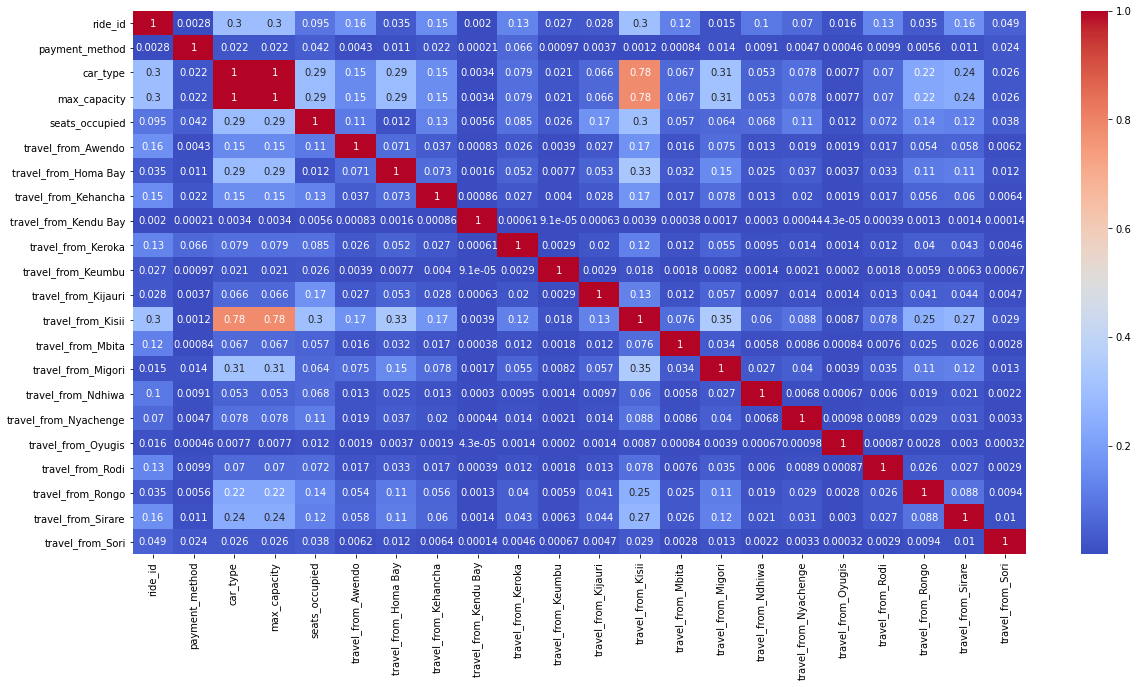

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(correlarion),cmap='coolwarm',annot=True)

In [40]:
#Splitting the train and test data
from sklearn.model_selection import train_test_split

In [41]:
df2.describe(include='all')

,ride_id,payment_method,travel_date,travel_time,travel_to,car_type,max_capacity,seats_occupied,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
count,51645.000000,51645.000000,51645,51645,51645,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000
unique,NaN,NaN,149,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10-12-17,7,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,856,29205,51645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10188.645793,0.997812,NaN,NaN,NaN,0.619324,34.534321,51.085120,0.034621,0.122064,0.036964,0.000019,0.019131,0.000426,0.019963,0.437738,0.007319,0.136064,0.004570,0.009914,0.000097,0.007842,0.076058,0.086146,0.001065
std,2211.295708,0.046725,NaN,NaN,NaN,0.485558,18.451193,39.468227,0.182820,0.327363,0.188675,0.004400,0.136985,0.020635,0.139875,0.496113,0.085239,0.342859,0.067445,0.099074,0.009839,0.088208,0.265093,0.280582,0.032617
min,1442.000000,0.000000,NaN,NaN,NaN,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8287.000000,1.000000,NaN,NaN,NaN,0.000000,11.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10353.000000,1.000000,NaN,NaN,NaN,1.000000,49.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12029.000000,1.000000,NaN,NaN,NaN,1.000000,49.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
df2['date']=df2['travel_date'].apply(lambda x: x[0:2])

In [43]:
df2['month']=df2['travel_date'].apply(lambda x: x[3:5])

In [44]:
df2['year']=df['travel_date'].apply(lambda x: x[6:8])

In [54]:
indep_var=df2.drop(columns={'ride_id','travel_to','seats_occupied','travel_date'})

In [55]:
indep_var

,payment_method,travel_time,car_type,max_capacity,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,date,month,year
0,1,7,1,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,17,10,17
1,1,7,1,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,19,11,17
2,1,7,1,49,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,26,11,17
3,1,7,1,49,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,11,17
4,1,7,1,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,27,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,1,8,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,04,18
51641,1,8,1,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,20,04,18
51642,1,8,1,49,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,20,04,18
51643,1,7,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,04,18


In [56]:
dep_var=df2['seats_occupied']

In [57]:
dep_var

0         1
1         1
2         1
3        36
4        45
         ..
51640     1
51641    29
51642    29
51643    47
51644     1
Name: seats_occupied, Length: 51645, dtype: int64

In [58]:
#Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [59]:
min_max_scaler=MinMaxScaler()

In [60]:
df2_scaled=min_max_scaler.fit_transform(indep_var)

In [61]:
df2_scaled

array([[1.        , 0.75      , 1.        , ..., 0.53333333, 0.81818182,
        0.        ],
       [1.        , 0.75      , 1.        , ..., 0.6       , 0.90909091,
        0.        ],
       [1.        , 0.75      , 1.        , ..., 0.83333333, 0.90909091,
        0.        ],
       ...,
       [1.        , 0.875     , 1.        , ..., 0.63333333, 0.27272727,
        1.        ],
       [1.        , 0.75      , 1.        , ..., 0.63333333, 0.27272727,
        1.        ],
       [1.        , 0.5       , 1.        , ..., 0.43333333, 0.90909091,
        0.        ]])

In [62]:
#Performing train-test split on our variables
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df2_scaled,dep_var,random_state=0,test_size=0.3) 

In [63]:
Xtrain

array([[1.        , 0.5       , 0.        , ..., 0.9       , 0.90909091,
        0.        ],
       [1.        , 0.75      , 1.        , ..., 0.73333333, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.3       , 1.        ,
        0.        ],
       ...,
       [1.        , 0.75      , 0.        , ..., 0.93333333, 0.90909091,
        0.        ],
       [1.        , 0.75      , 1.        , ..., 0.86666667, 0.18181818,
        1.        ],
       [1.        , 0.75      , 1.        , ..., 0.16666667, 1.        ,
        0.        ]])

In [64]:
Ytrain

46543     66
18230     10
35304    253
47825     32
26979     44
        ... 
21243     57
45891      3
42613     17
43567     63
2732      41
Name: seats_occupied, Length: 36151, dtype: int64

In [65]:
#Performing our first ML algo, Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
r2_score(Ytrain,model.predict(Xtrain))

0.3859318449839684

In [68]:
r2_score(Ytest,model.predict(Xtest))

0.38646357117880226

In [69]:
#Perfoming XG Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
import xgboost as xgb
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(Xtrain, Ytrain)
y_pred = dreg.predict(Xtest)
#Find R-squared value
r2 = r2_score(Ytest, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Ytest, y_pred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
train_score = dreg.score(Xtrain, Ytrain)
test_score = dreg.score(Xtest,Ytest)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print('Mean Squared Error (MSE): ',mean_squared_error(Ytest, y_pred))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(Ytest, y_pred)))
print('R2: ',r2)
print('Adjusted R2: ',adj_r2)

[17:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9757031938018432
Test score: 0.9753344055383345
Mean Squared Error (MSE):  39.73575034565781
Root Mean Squared Error (MSE):  6.303629934066388
R2:  0.9753344055383345
Adjusted R2:  0.9752961371132857


In [71]:
#Performing GridSearch CV on XG Boost Regressor Algo
from sklearn.model_selection import GridSearchCV

In [72]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
import xgboost as xgb
xgb = xgb.XGBRegressor(random_state=0)

In [76]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[17:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  4.6min finished


[17:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [77]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [78]:
reg_optimal_model =reg_gs.best_estimator_

In [79]:
train_preds = reg_optimal_model.predict(Xtrain)
test_preds = reg_optimal_model.predict(Xtest)

In [80]:
reg_optimal_model.score(Xtest,Ytest)

0.9877472165953002

In [81]:
reg_optimal_model.score(Xtrain,Ytrain)

0.9887890049200776

In [82]:
adj_r2=1-(1-r2_score(Ytest, test_preds))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))

In [83]:
r2

0.9753344055383345

In [84]:
r2 = r2_score(Ytest, test_preds)

In [85]:
r2_score(Ytrain,reg_gs.predict(Xtrain))

0.9887890049200775

In [86]:
r2_score(Ytest,reg_gs.predict(Xtest))

0.9877472165953003

In [88]:
#Performing Gradient boosting
reg = GradientBoostingRegressor(random_state=0)
reg.fit(Xtrain, Ytrain)
  # Predicting 
y_pred = reg.predict(Xtest)
  #Find R-squared value
r2_score(Ytest, y_pred)

0.6719248158726072

In [89]:
#Performing L2 Regression
from sklearn import linear_model

In [90]:
rgr = linear_model.Ridge().fit(df2_scaled, dep_var)

In [91]:
r2_score(Ytrain,rgr.predict(Xtrain))

0.38628884006594555

In [92]:
r2_score(Ytest,rgr.predict(Xtest))

0.38700697517154625

In [95]:
#Finally performing Random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 99, random_state = 0,max_depth=50)
regressor.fit(Xtrain,Ytrain)
preds = regressor.predict(Xtrain)
r2_score(Ytrain,preds)

0.9995722338601323